# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rihan Naufaldihanif
- **Email:** rihannaufal22@gmail.com
- **ID Dicoding:** naufal2204

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda melalui parameter temperature dan humidity?
- Apakah ada perbedaan signifikan dalam jumlah peminjaman sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Membaca dan menampilkan data

In [2]:
data = pd.read_csv('data/day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Pemeriksaan apakah ada missing value dan duplikat data

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [31]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [32]:
print("jumlah duplicate data: " + str(data.duplicated().sum()))

jumlah duplicate data: 0


Setelah melihat data, dapat disimpulkan bahwa:
- Tidak ada missing value
- Tidak ada duplikat data
- Data sudah bersih

### Cleaning Data

Untuk mencegah terjadinya kesalahan dalam analisis data, saya melakukan metode drop untuk menghapus data missing value

In [3]:
data.dropna(axis=0, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Explore Data Analysis (EDA)

Melihat distribusi data dan statistik deskriptif

In [33]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda melalui parameter temperature dan humidity?


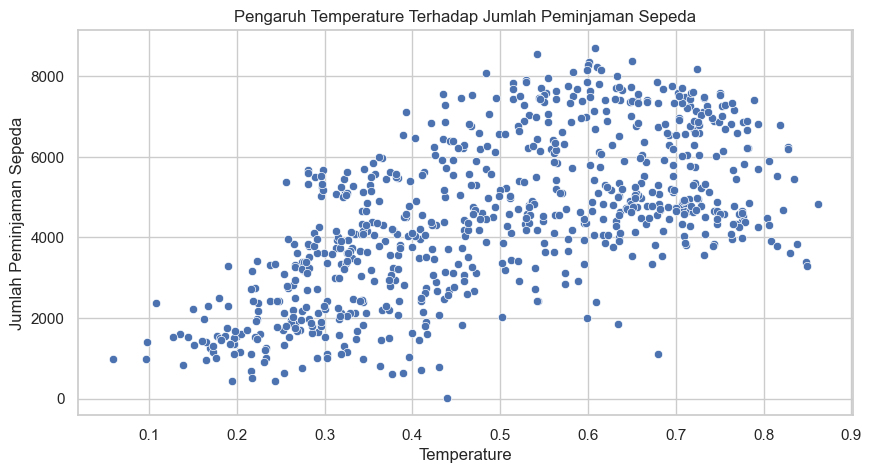

In [50]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='temp', y='cnt', data=data, )
plt.title('Pengaruh Temperature Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Temperature')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

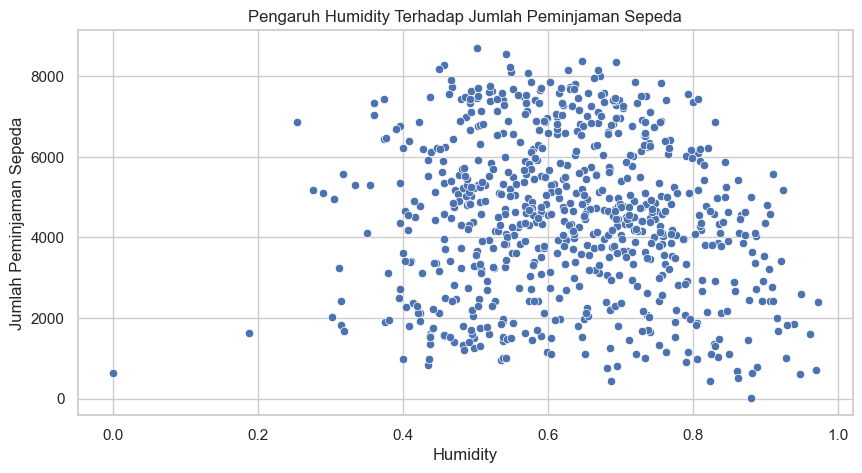

In [51]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='hum', y='cnt', data=data)
plt.title('Pengaruh Humidity Terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Humidity')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

<Figure size 1000x500 with 0 Axes>

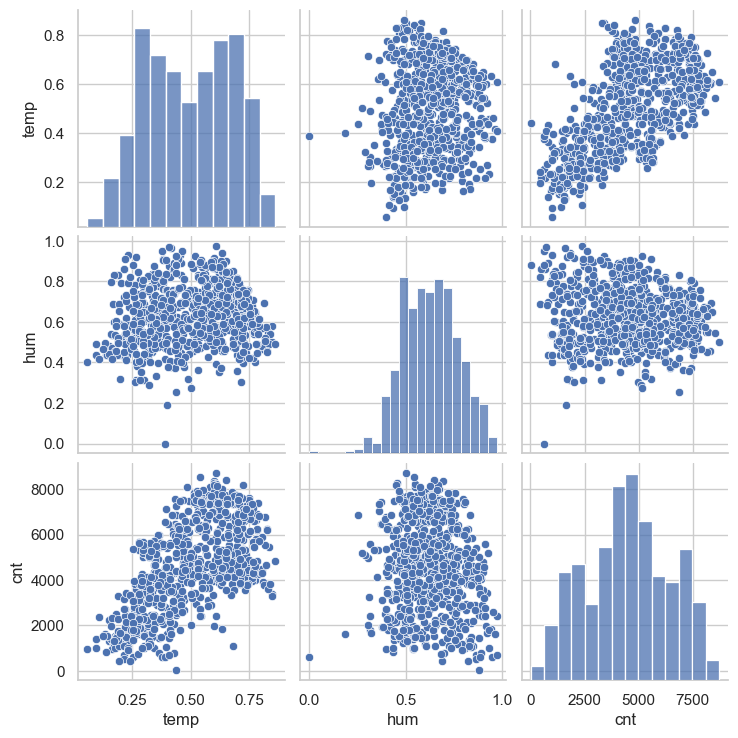

In [42]:
plt.figure(figsize=(10,5))
sns.pairplot(data[['temp', 'hum', 'cnt']])
plt.show()

### Pertanyaan 2:
Apakah ada perbedaan signifikan dalam jumlah peminjaman sepeda antara hari kerja dan akhir pekan?

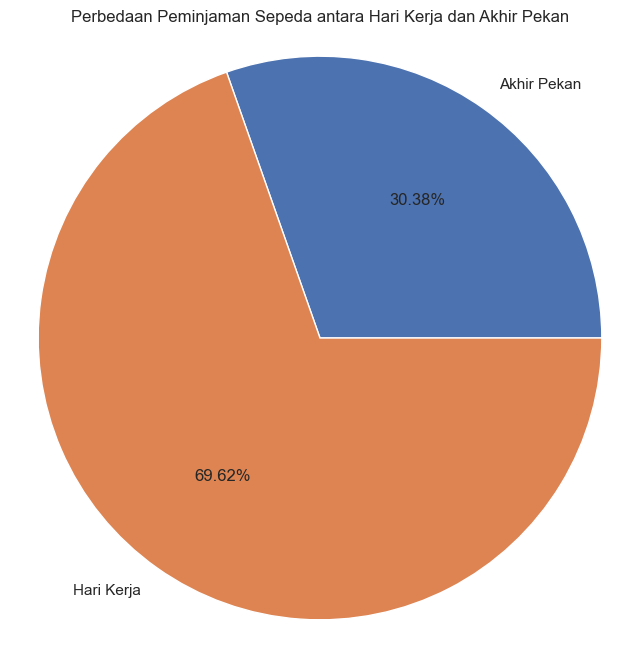

In [66]:
workingday_counts = data.groupby('workingday')['cnt'].sum()

labels = ['Akhir Pekan', 'Hari Kerja'] 
plt.figure(figsize=(8, 8))
plt.pie(workingday_counts, labels=labels, autopct='%1.2f%%')
plt.title('Perbedaan Peminjaman Sepeda antara Hari Kerja dan Akhir Pekan')
plt.axis('equal') 
plt.show()

## Conclusion

### Conclution pertanyaan 1

Berdasarkan hasil analisis data, dapat disimpulkan bahwa terdapat pengaruh antara kondisi cuaca terhadap jumlah peminjaman sepeda. Hal ini dapat dilihat melalui scatter plot yang menunjukkan bahwa semakin tinggi temperature, jumlah peminjaman sepeda juga semakin tinggi. Sedangkan semakin tinggi humidity, jumlah peminjaman sepeda semakin rendah. 

### Conclution pertanyaan 2

Berdasarkan hasil analisis data, dapat disimpulkan bahwa pada hari kerja terjadi peningkatan jumlah peminjaman sepeda dibandingkan dengan akhir pekan. Hal ini dapat dilihat melalui pie chart yang menunjukkan bahwa peminjaman sepeda pada hari kerja mencapai 69,62%.